In [13]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [14]:
df = pd.read_csv('housing.csv')
sub_df = df[['lotsize', 'price']]

In [15]:
def polynomial(data, degree):
    lotsize = data['lotsize']
    for power in range(2, degree+1):
        name = 'lotsize_' + str(power)
        data.loc[:, name] = lotsize ** power
    return data

In [17]:
poly_data = polynomial(sub_df, 5)
X = np.array(poly_data[['lotsize', 'lotsize_2', 'lotsize_3', 'lotsize_4', 'lotsize_5']])
y = np.array(poly_data[['price']])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=123, test_size=0.3)

In [19]:
alpha_list = [i/10 for i in list(range(1, 1000, 1))] + list(range(100, 200000, 100))

In [20]:
from sklearn.linear_model import Ridge
import copy
weight_coeff_list = []
RMSE_list = []
for alpha in alpha_list:
    alpha = alpha/10
    train_x , train_y = copy.deepcopy(X_train), copy.deepcopy(y_train)
    rdg = Ridge(alpha = alpha, fit_intercept=True)
    rdg.fit(train_x, train_y)
    predicition_train = rdg.predict(X_train)
    predicition_test = rdg.predict(X_test)
    rmse_train = metrics.mean_squared_error(y_train, predicition_train)**0.5
    rmse_test = metrics.mean_squared_error(y_test, predicition_test)**0.5
    RMSE_list.append([alpha, rmse_train,  rmse_test])
    weight_coeff_list.append([alpha, rdg.intercept_[0]] + list(rdg.coef_[0]))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.02905e-34): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.02905e-34): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.02905e-34): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.02905e-34): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Il

In [21]:
min_rmse_test = np.min(np.array(RMSE_list)[:,2])
ind = list(np.array(RMSE_list)[:,2]).index(min_rmse_test)

In [22]:
print(f"Aplha: {RMSE_list[ind][0]}, RMSE Train: {RMSE_list[ind][1]}, RMSE Test: {RMSE_list[ind][2]}")

Aplha: 19990.0, RMSE Train: 22080.038997219515, RMSE Test: 20399.75661661343


In [23]:
print(f"Alpha: {weight_coeff_list[ind][0]} W0: {weight_coeff_list[ind][1]} W1: {weight_coeff_list[ind][2]} W2:{weight_coeff_list[ind][3]} W3:{weight_coeff_list[ind][4]}, W4:{weight_coeff_list[ind][5]} W5:{weight_coeff_list[ind][6]}")

Alpha: 19990.0 W0: 73514.97821024628 W1: -29.186288621031007 W2:0.009796847562705902 W3:-9.773495810911114e-07, W4:3.074438048946916e-11 W5:1.979824688196673e-17


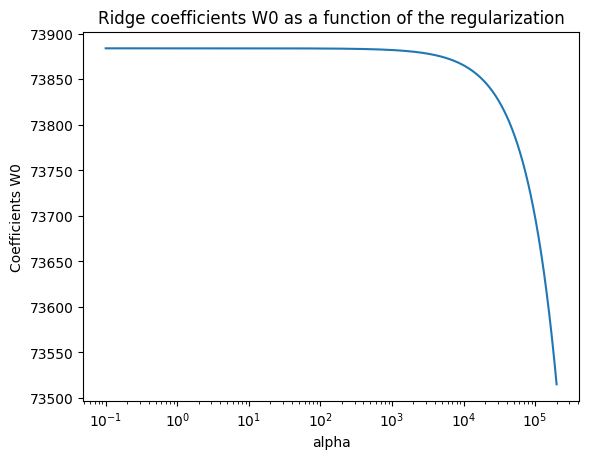

In [24]:
from matplotlib import pyplot as plt 
ax = plt.gca()
ax.plot(alpha_list, np.array(weight_coeff_list)[:,1])
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel("alpha")
plt.ylabel("Coefficients W0")
plt.title("Ridge coefficients W0 as a function of the regularization")
plt.axis("tight")
plt.show()

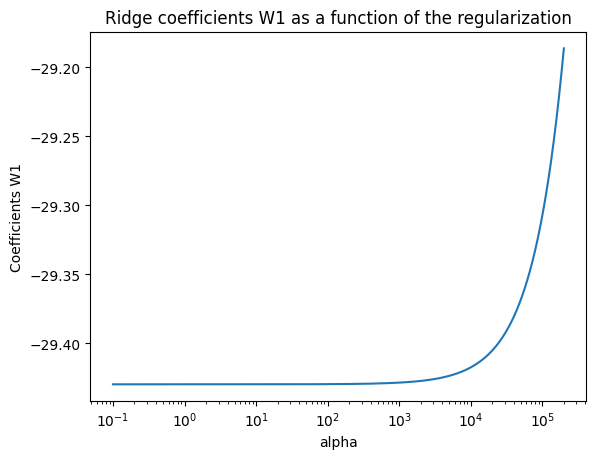

In [25]:
from matplotlib import pyplot as plt 
ax = plt.gca()
ax.plot(alpha_list, np.array(weight_coeff_list)[:,2])
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel("alpha")
plt.ylabel("Coefficients W1")
plt.title("Ridge coefficients W1 as a function of the regularization")
plt.axis("tight")
plt.show()

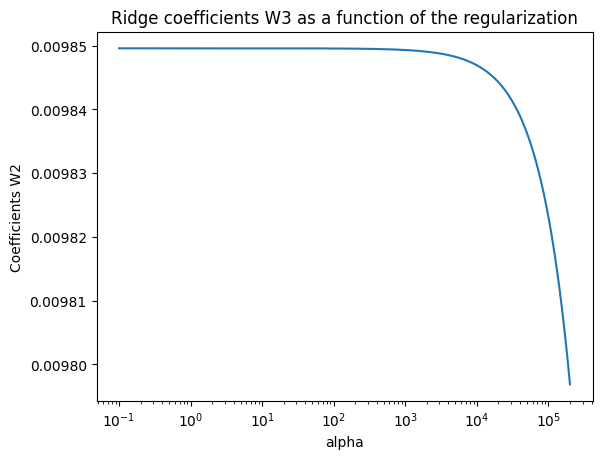

In [26]:
from matplotlib import pyplot as plt 
ax = plt.gca()
ax.plot(alpha_list, np.array(weight_coeff_list)[:,3])
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel("alpha")
plt.ylabel("Coefficients W2")
plt.title("Ridge coefficients W3 as a function of the regularization")
plt.axis("tight")
plt.show()

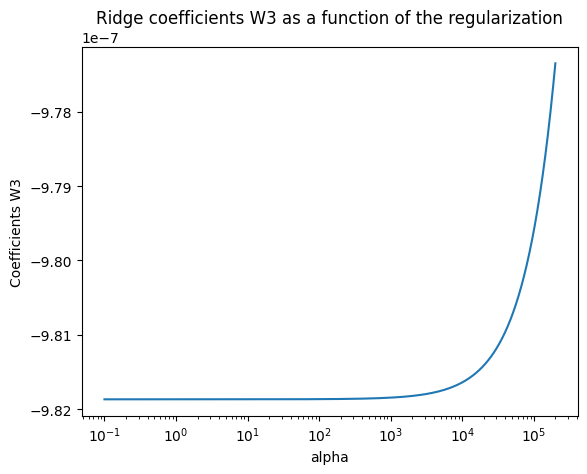

In [27]:
from matplotlib import pyplot as plt 
ax = plt.gca()
ax.plot(alpha_list, np.array(weight_coeff_list)[:,4])
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel("alpha")
plt.ylabel("Coefficients W3")
plt.title("Ridge coefficients W3 as a function of the regularization")
plt.axis("tight")
plt.show()

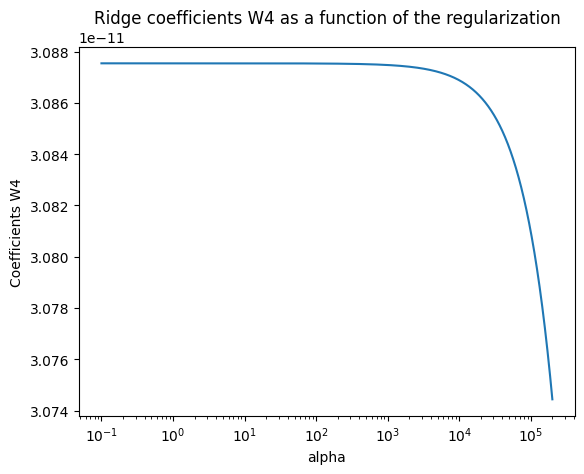

In [28]:
from matplotlib import pyplot as plt 
ax = plt.gca()
ax.plot(alpha_list, np.array(weight_coeff_list)[:,5])
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel("alpha")
plt.ylabel("Coefficients W4")
plt.title("Ridge coefficients W4 as a function of the regularization")
plt.axis("tight")
plt.show()

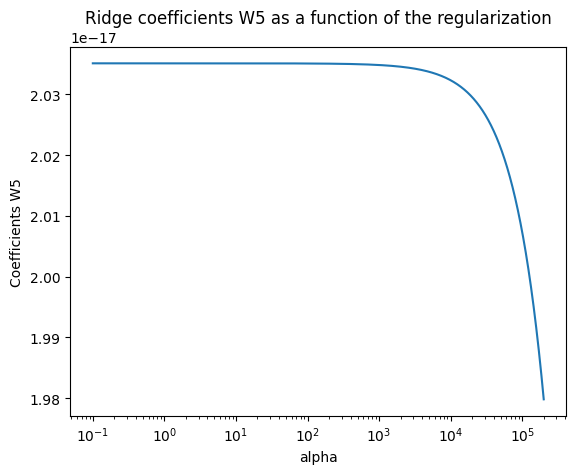

In [29]:
from matplotlib import pyplot as plt 
ax = plt.gca()
ax.plot(alpha_list, np.array(weight_coeff_list)[:,6])
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel("alpha")
plt.ylabel("Coefficients W5")
plt.title("Ridge coefficients W5 as a function of the regularization")
plt.axis("tight")
plt.show()

In [66]:
rdg = Ridge(alpha = 1, fit_intercept=True)
rdg.fit(train_x, train_y)
y = rdg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.02905e-34): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [69]:
x = X_test[:,0]

In [70]:
rdg = Ridge(alpha = 19990.0 , fit_intercept=True)
rdg.fit(train_x, train_y)
y_with_reg = rdg.predict(np.array(X_test))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.06264e-34): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


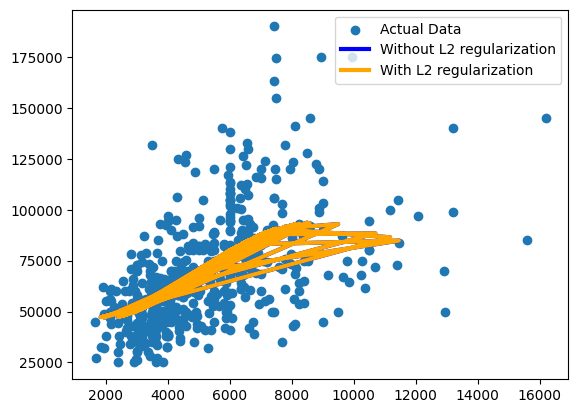

In [71]:
plt.scatter(df[['lotsize']], df[['price']])
plt.plot(x, y, color="blue", linewidth=3)
plt.plot(x, y_with_reg, color="orange", linewidth=3)
plt.legend(["Actual Data" , "Without L2 regularization", "With L2 regularization"])